<a href="https://colab.research.google.com/github/atharva1503/compression/blob/master/img_opr_by_avs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [0]:
img = cv2.imread('face.jpeg')

In [17]:
#for checking a variable is assigned with image or not
#if not assigned anything it will give None as output

img


array([[[ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36],
        ...,
        [ 36,  36,  36],
        [ 37,  37,  37],
        [ 38,  38,  38]],

       [[135, 135, 135],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [136, 136, 136]],

       [[233, 233, 233],
        [233, 233, 233],
        [233, 233, 233],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       ...,

       [[101, 111,   5],
        [102, 112,   6],
        [102, 112,   6],
        ...,
        [117, 128,   6],
        [121, 133,   7],
        [124, 137,   9]],

       [[ 98, 108,   2],
        [ 99, 109,   3],
        [ 99, 109,   3],
        ...,
        [117, 128,   4],
        [119, 131,   5],
        [122, 135,   7]],

       [[ 97, 107,   1],
        [ 98, 108,   2],
        [ 97, 107,   1],
        ...,
        [117, 127,   3],
        [118, 130,   4],
        [120, 133,   5]]

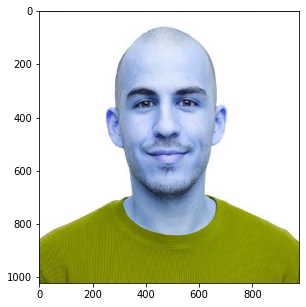

In [18]:
#showing img
plt.imshow(img)


In [15]:
# Matplot lib expects img in RGB format but OpenCV provides it in BGR.
#METHOD 1 
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

error: ignored

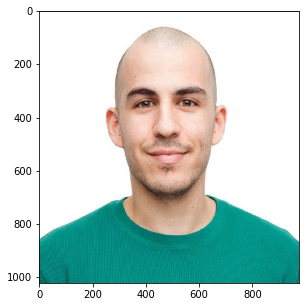

In [20]:
#reverse slicing
#METHOD 2 for getting original coloured image i.e. in RBG format
img3 = img[:,:,::-1]
plt.imshow(img3)
plt.show()

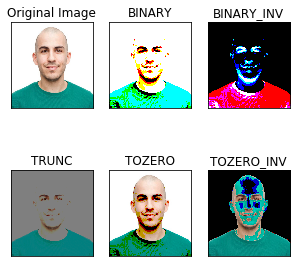

In [21]:
#Different operations on Images
#Operation 1- THRESHOLDING

# If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
ret,thresh1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)  

# Inverted or Opposite case of cv2.THRESH_BINARY.
ret,thresh2 = cv.threshold(img2,127,255,cv.THRESH_BINARY_INV)

# If pixel intensity value is greater than threshold, it is truncated to the threshold. 
# The pixel values are set to be the same as the threshold. All other values remain the same.
ret,thresh3 = cv.threshold(img2,127,255,cv.THRESH_TRUNC)

# Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
ret,thresh4 = cv.threshold(img2,127,255,cv.THRESH_TOZERO)

# Inverted or Opposite case of cv2.THRESH_TOZERO.
ret,thresh5 = cv.threshold(img2,207,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img2, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

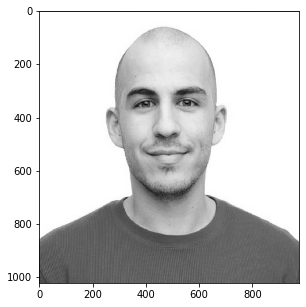

In [22]:
#Gray scale image
#gray img is different from binary image,as binary has pixel values only 0 or 1 and for gray pixel may variy till 256 value
GRAY_img = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
#plt.imshow(RGB_img)

plt.imshow(GRAY_img,cmap='gray')

plt.show()

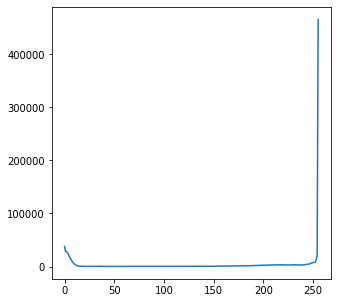

In [24]:
#histogram - opencv
plt.rcParams['figure.figsize'] = [5, 5]
hist = cv.calcHist([img2],[0],None,[256],[0,256]) #You can give mask for specifying Region of interest
plt.plot(hist)
plt.show()

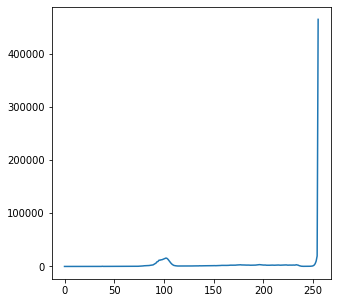

In [11]:
#histogram - opencv
plt.rcParams['figure.figsize'] = [5, 5]
hist = cv.calcHist([GRAY_img],[0],None,[256],[0,256]) #You can give mask for specifying Region of interest
plt.plot(hist)
plt.show()

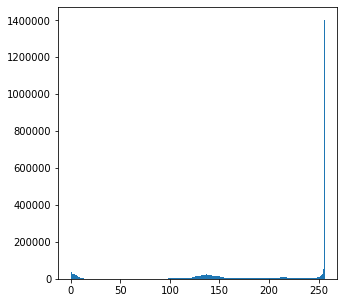

In [12]:
#img.ravel gives a flattened array
plt.hist(img.ravel(),256,[0,256]); plt.show() 

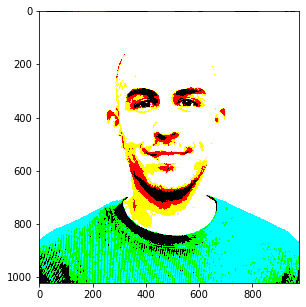

In [25]:
# If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
ret,thresh6 = cv.threshold(img2,130,255,cv.THRESH_BINARY)  
#choose appropriate value for 130, too large and it won't display lines 
#(will make them black as it will count lesser intensity white as black). 
#but too small and we won't have a clear lines as it will include high intensity patches of road

plt.imshow(thresh6,cmap='gray')
plt.show()



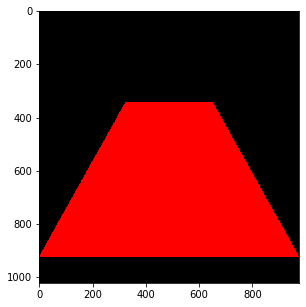

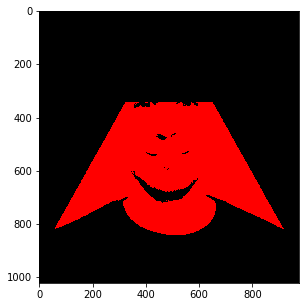

In [29]:
#Creating a mask
bottom_padding = 100
height = thresh6.shape[0]
width = thresh6.shape[1]
bottom_left = [0, height - bottom_padding]
bottom_right = [width, height - bottom_padding]
top_right = [width*2/3, height*1/3]
top_left = [width*1/3, height*1/3]
vertices = [np.array([bottom_left,top_left,top_right,bottom_right] , dtype = np.int32)]
mask = np.zeros_like(thresh6)
cv.fillPoly(mask,vertices,255)
plt.imshow(mask,cmap='gray')
plt.show()
masked_img = cv.bitwise_and(thresh6,mask)
plt.imshow(masked_img,cmap='gray')

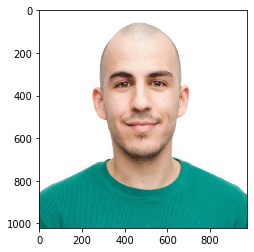

In [30]:
#For blurring
plt.rcParams['figure.figsize'] = [4, 4]
blur_img = cv.GaussianBlur(img2, (3,3),0)  
#3 ,3 beacuse incresing the kernel size blurs the edges more , we want to keep them intact, espescially weak edges
#however it can change depending on the case, 
#for only detection of large objects high kernel size can be used, eg detection of rainbow
#The kernel size must be very small as compared to img size
plt.imshow(blur_img, cmap = 'gray')


In [0]:
img4 = cv.imread('2.jpg')

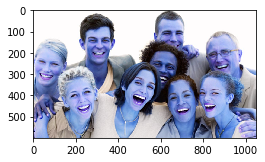

In [36]:
plt.imshow(img4)

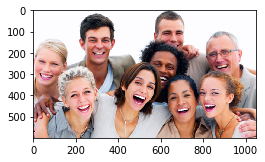

In [37]:
img5 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.imshow(img5)

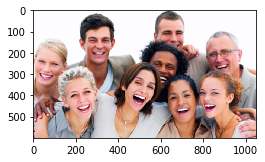

In [38]:
#For blurring
plt.rcParams['figure.figsize'] = [4, 4]
blur_img1 = cv.GaussianBlur(img5, (3,3),0)  
#3 ,3 beacuse incresing the kernel size blurs the edges more , we want to keep them intact, espescially weak edges
#however it can change depending on the case, 
#for only detection of large objects high kernel size can be used, eg detection of rainbow
#The kernel size must be very small as compared to img size
plt.imshow(blur_img1, cmap = 'gray')

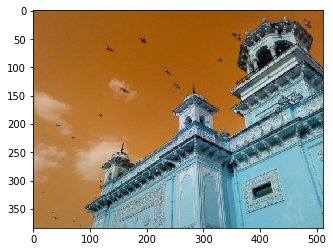

In [5]:
img7 = cv.imread('monument.jpg')
plt.imshow(img7)

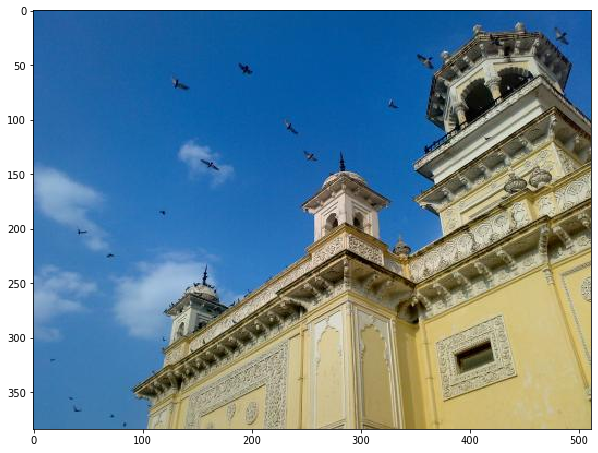

In [12]:
img8 = cv.cvtColor(img7, cv.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [10,10]
plt.imshow(img8)

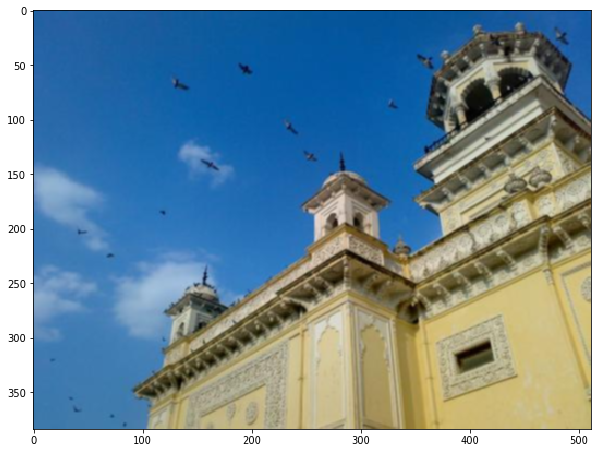

In [11]:
#For blurring
plt.rcParams['figure.figsize'] = [10,10]
blur_img2 = cv.GaussianBlur(img8, (3,3),0)  
#3 ,3 beacuse incresing the kernel size blurs the edges more , we want to keep them intact, espescially weak edges
#however it can change depending on the case, 
#for only detection of large objects high kernel size can be used, eg detection of rainbow
#The kernel size must be very small as compared to img size
plt.imshow(blur_img2, cmap = 'gray')

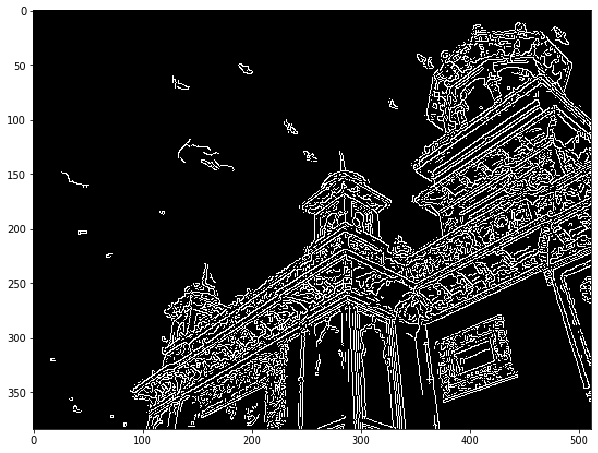

In [13]:
#Canny 
edges1 = cv.Canny(img8,100,150)  #100, 150 threshold values
plt.imshow(edges1, cmap = 'gray')

In [15]:
ht = cv.HoughLines(edges1,0.2,20)
plt.imshow(ht)
plt.show()

TypeError: ignored